# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

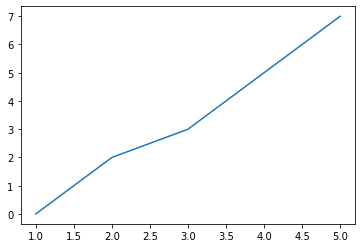

In [6]:
plt.plot([1,2,3,4,5],[0,2,3,5,7]);

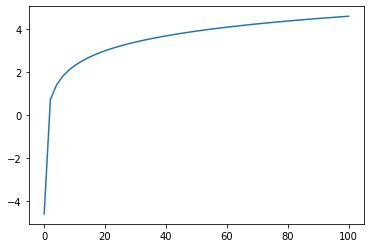

In [5]:
xs = np.linspace(.01,100)
ys = np.log(xs)
plt.plot(xs,ys);

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


In [25]:
x = np.linspace(-7,7)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

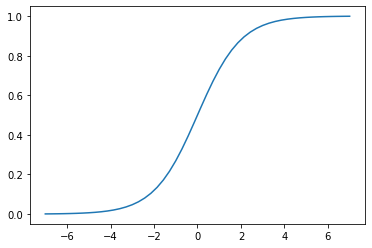

In [26]:
plt.plot(x,sigmoid(x));

### Scatter plots

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


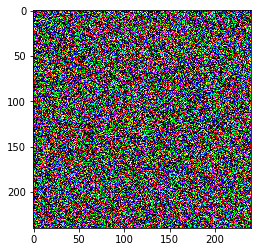

In [29]:
xs= np.random.randn(240,240,3)
plt.imshow(xs);

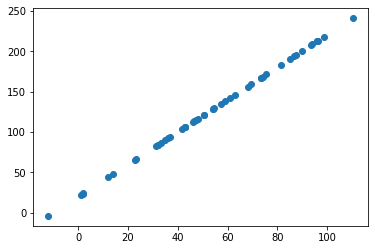

In [32]:
xs = np.random.randn(50) * 30 + 50
ys = 2 * xs + 20
plt.scatter(xs,ys,)

In [34]:
xs = np.random.randn(50) * 30 + 50
ys = 2 * xs + 20 np.random.randn(50) * 30
plt.scatter(xs,ys,)

SyntaxError: invalid syntax (<ipython-input-34-890ec3dcf12b>, line 2)

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


This is what happens if you make a line plot of unsorted data:

### Bar plots

Do not confuse with histograms

([<matplotlib.axis.XTick at 0x1182956d8>,
 <a list of 3 Text xticklabel objects>)

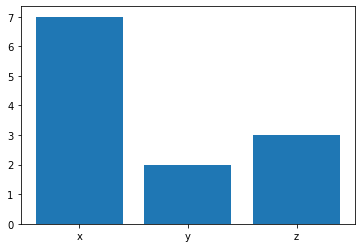

In [38]:
plt.bar(range(3),[7,2,3]); #Barplot x es var discreta, histo es var continua
plt.xticks(range(3), ['x','y','z'])

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

(0, 25)

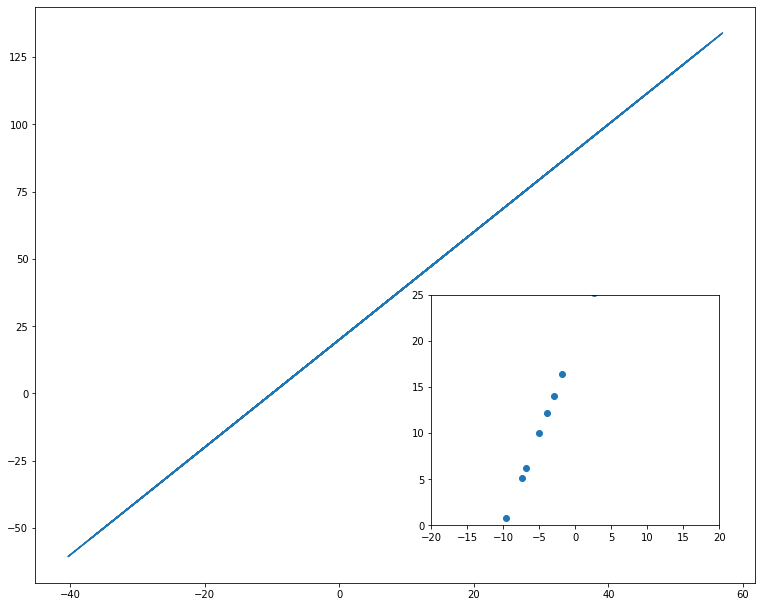

In [55]:
f = plt.figure(figsize=(10,8))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([.55,.1,.4,.4])

axes1.plot(xs,ys)
axes2.scatter(xs,ys)
axes2.set_xlim(-20,20)
axes2.set_ylim(0,25)

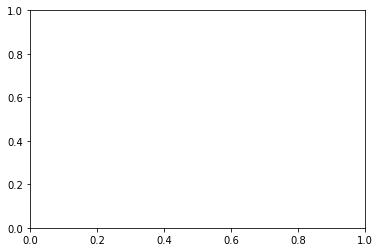

In [56]:
plt.gcf()
plt.gca()

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

(0, 25)

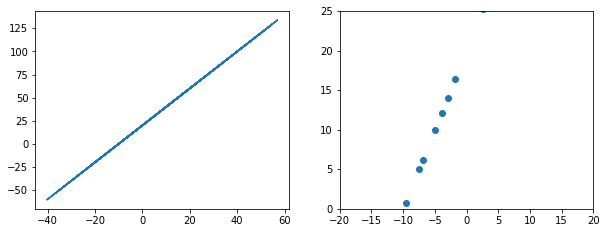

In [68]:
f = plt.figure(figsize=(10,8))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(2,2,2)


axes1.plot(xs,ys)
axes2.scatter(xs,ys)
axes2.set_xlim(-20,20)
axes2.set_ylim(0,25)

### `figure.subplots()`

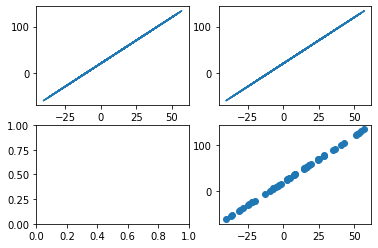

In [85]:
f, ax = plt.subplots(2,2)
ax[1,1].scatter(xs,ys)
ax[0,0].plot(xs,ys)
ax[0,1].plot(xs,ys)

### Sharing axis

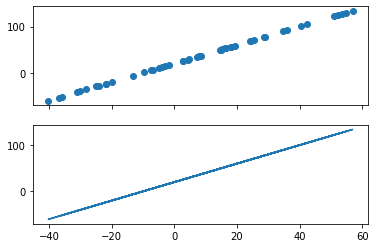

In [84]:
#https://fivethirtyeight.com/
f, ax = plt.subplots(2,1, sharex=True) ##Dibuja un solo eje x
ax[0].scatter(xs,ys)
ax[1].plot(xs,ys)

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

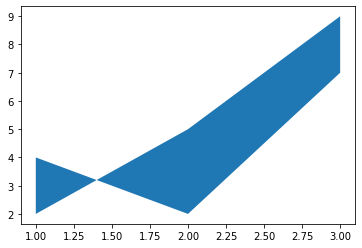

In [87]:
plt.fill_between([1,2,3],[4,2,7],[2,5,9]);

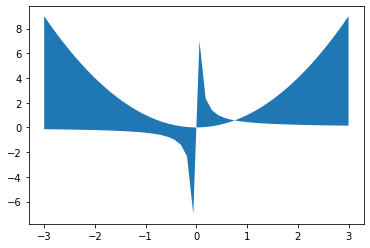

In [94]:
xs= np.linspace(-3,3)
plt.fill_between(xs,xs**2,1/x);

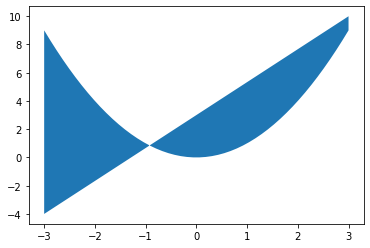

In [95]:
plt.fill_between(xs,xs**2,x+3);

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

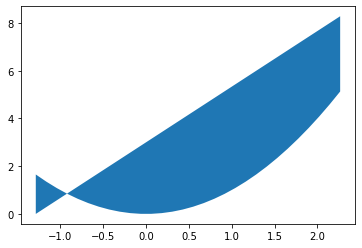

In [96]:
plt.fill_between(xs,xs**2,x+3, (xs+3) > xs**2);

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



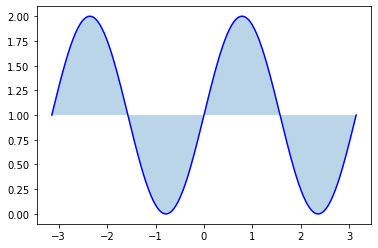

In [140]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X,Y+1,1,alpha=.3);


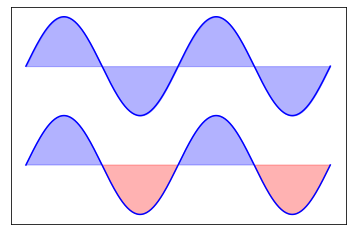

In [155]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X,Y+1,1,alpha=.3,color='blue');

plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X,Y-1,-1,where=Y-1>-1,alpha=.3,color='blue');
plt.fill_between(X,Y-1,-1,where=Y-1<-1,alpha=.3,color='red');
plt.xticks([])
plt.yticks([])
plt.savefig('figura.png');

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

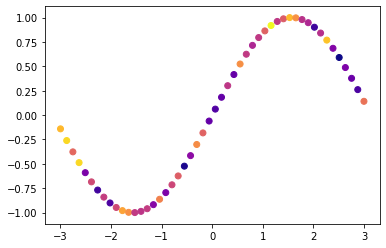

In [198]:
from matplotlib import cm

cmap = cm.get_cmap('plasma')
plt.scatter(xs,np.sin(xs),c=np.random.randn(len(xs)),cmap=cmap);

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

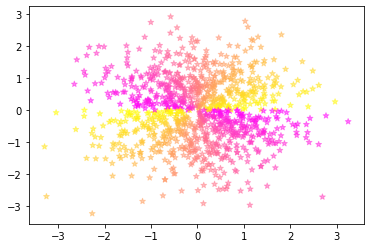

In [220]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

cmap = cm.get_cmap('spring')

plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap,alpha=.5,marker='*')
plt.show()

### Markers and linestyles

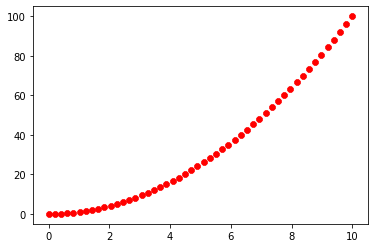

In [226]:
x = np.linspace(0,10);
y = x**2

plt.scatter(x,y,color='red',marker='8');

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

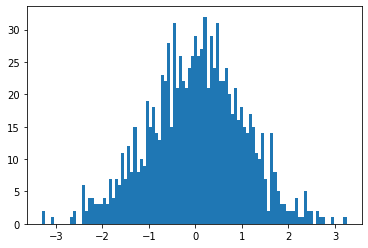

In [230]:
plt.hist(X,bins=100);

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



$$\mu = 4$$

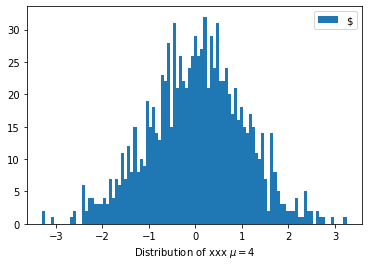

In [240]:
plt.hist(X,bins=100); 
plt.xlabel(r'Distribution of xxx $\mu = 4$')
plt.legend('$$\mu = 4$$');

## Legends

## Ticks, tick labels, limits

### Ticks

(20, 60)

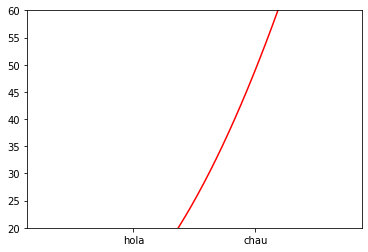

In [247]:
x = np.linspace(0,10);
y = x**2

plt.plot(x,y,color='red');
ax = plt.gca() #Get Current Axes
ax.set_xticks([3,7]);
ax.set_xticklabels(['hola', 'chau']);
ax.set_ylim(20,60)

### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



In [317]:
df = pd.read_csv('houses.csv',index_col=0)

short_column_names = ['local_prices', 'bathrooms', 'site_area', 
                      'living_area', 'garages', 'rooms', 
                      'bedrooms', 'age', 'construction_type', 
                      'architecture', 'fireplaces', 'price']

df.columns = short_column_names
df.head()


,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

In [263]:
df.head()

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
index,,,,,,,,,,,,
1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


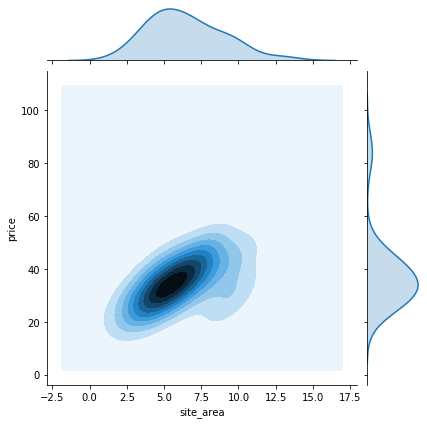

In [264]:
import seaborn as sns

sns.jointplot(data=df,x='site_area',y='price', kind='kde'); #Dist. multivariante

### Histogram

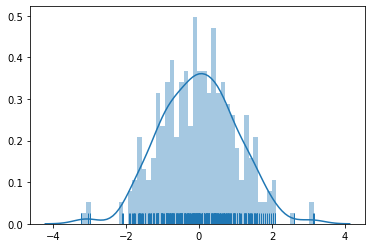

In [270]:

sns.distplot(np.random.randn(300), bins=50, rug=True); 

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [290]:
smaller = df[['local_prices','site_area','living_area','rooms','age']]
smaller

,local_prices,site_area,living_area,rooms,age
index,,,,,
1,4.9176,3.4720,0.998,7,42
2,5.0208,3.5310,1.500,7,62
3,4.5429,2.2750,1.175,6,40
4,4.5573,4.0500,1.232,6,54
5,5.0597,4.4550,1.121,6,42
6,3.8910,4.4550,0.988,6,56
7,5.8980,5.8500,1.240,7,51
8,5.6039,9.5200,1.501,6,32
9,16.4202,9.8000,3.420,10,42


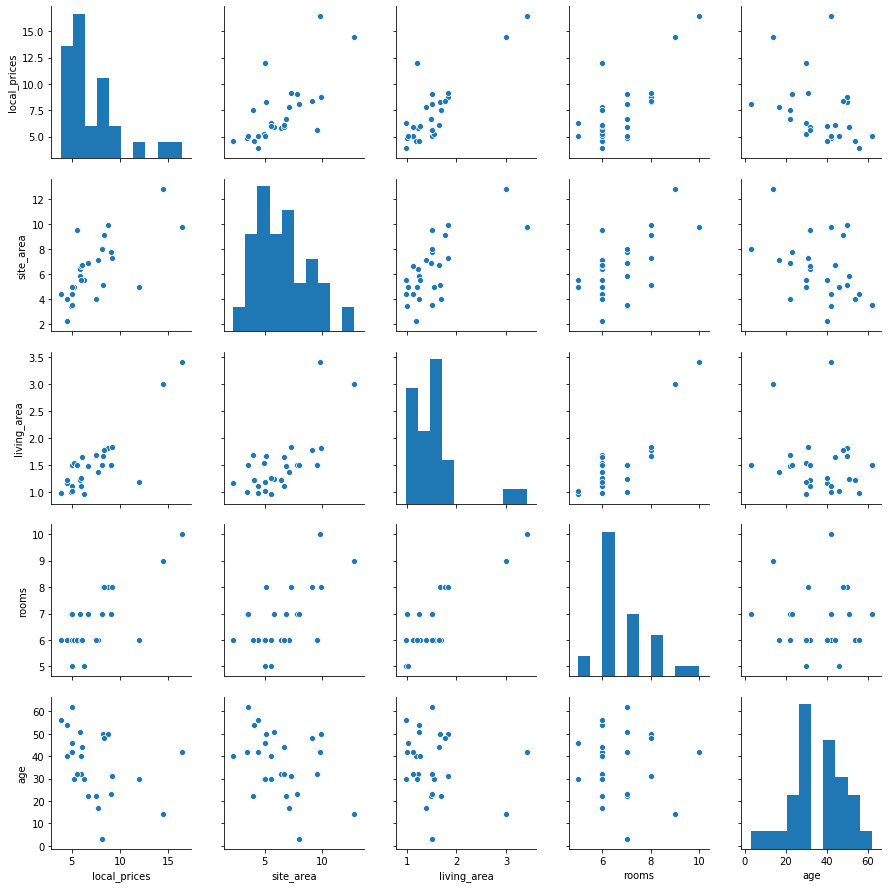

In [276]:
sns.pairplot(smaller);

ValueError: `dataset` input should have multiple elements.

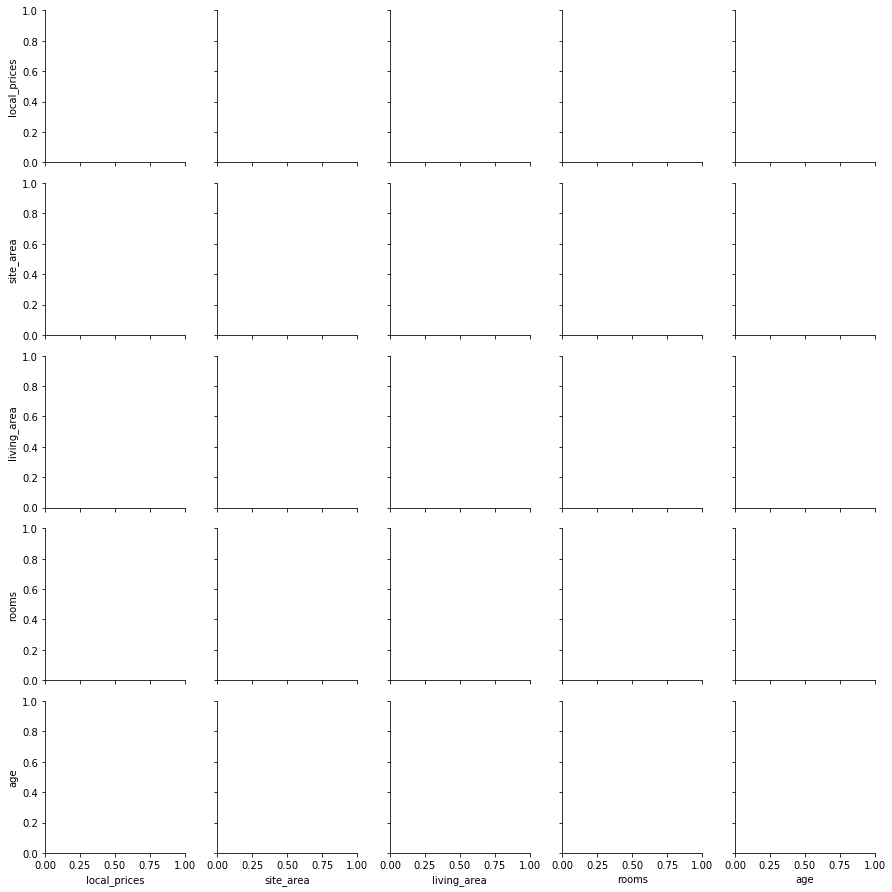

In [291]:
sns.pairplot(data=smaller,diag_kind='kde',hue='age')

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

TypeError: get_size_inches() takes 1 positional argument but 3 were given

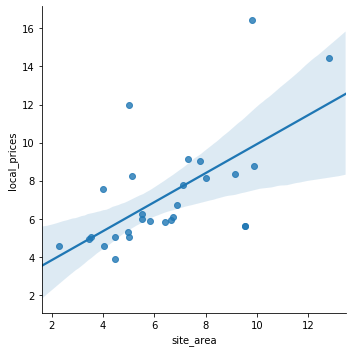

In [292]:
sns.lmplot(data=smaller,x='site_area',y='local_prices');
plt.gcf().get_size_inches(6,4)

## Categorical data 

Variables continuas(dinero) vs var. categoricas (sexo)

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [297]:
titanic = pd.read_csv('train.csv',index_col=0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Swarm plot

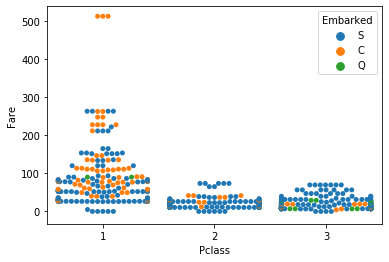

In [301]:
sns.swarmplot(data=titanic,x='Pclass',y='Fare',hue='Embarked');

### Boxplot

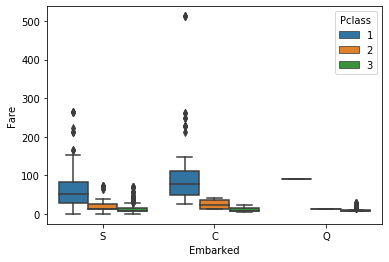

In [303]:
sns.boxplot(data=titanic,x='Embarked',y='Fare', hue='Pclass');

### Barplot / countplot

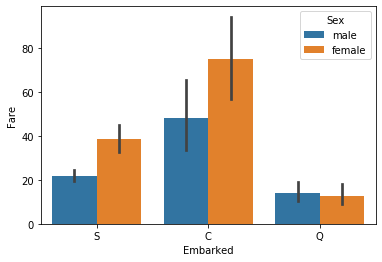

In [304]:
sns.barplot(data=titanic,x='Embarked',y='Fare', hue='Sex');

### Pointplot

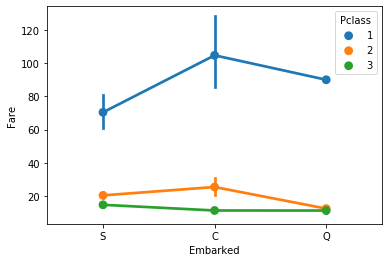

In [305]:
sns.pointplot(data=titanic,x='Embarked',y='Fare', hue='Pclass');

## Other types

### Heatmap

In [320]:
df.corr()

,local_prices,bathrooms,site_area,living_area,garages,rooms,bedrooms,age,construction_type,architecture,fireplaces,price
local_prices,1.000000,0.881496,0.628046,0.840312,0.513695,0.750969,0.652932,-0.342791,0.145689,0.057270,0.491864,0.923147
bathrooms,0.881496,1.000000,0.583495,0.894029,0.399777,0.757478,0.726375,-0.200938,0.187706,-0.250035,0.481197,0.925081
site_area,0.628046,0.583495,1.000000,0.680651,0.175567,0.564698,0.459350,-0.382963,-0.108468,0.089554,0.376435,0.666577
living_area,0.840312,0.894029,0.680651,1.000000,0.363548,0.840513,0.791281,-0.177487,0.055476,-0.063674,0.371852,0.921651
garages,0.513695,0.399777,0.175567,0.363548,1.000000,0.566325,0.539703,-0.057658,0.028662,0.096213,0.291581,0.461696
rooms,0.750969,0.757478,0.564698,0.840513,0.566325,1.000000,0.924445,0.011342,0.084212,-0.060402,0.396835,0.777145
bedrooms,0.652932,0.726375,0.459350,0.791281,0.539703,0.924445,1.000000,0.106928,0.126131,-0.248286,0.265366,0.700556
age,-0.342791,-0.200938,-0.382963,-0.177487,-0.057658,0.011342,0.106928,1.000000,0.168621,-0.499828,0.090787,-0.299297
construction_type,0.145689,0.187706,-0.108468,0.055476,0.028662,0.084212,0.126131,0.168621,1.000000,-0.184604,0.110257,0.172716
architecture,0.057270,-0.250035,0.089554,-0.063674,0.096213,-0.060402,-0.248286,-0.499828,-0.184604,1.000000,-0.264363,-0.022302


In [313]:
from matplotlib import cm

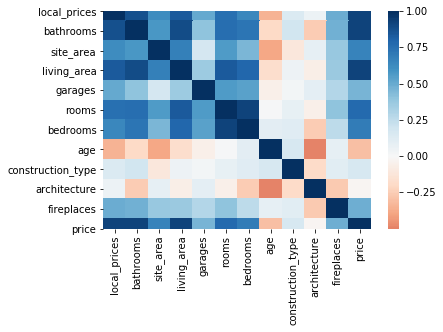

In [318]:
sns.heatmap(df.corr(),cmap='RdBu',center=0);

### Clustermap

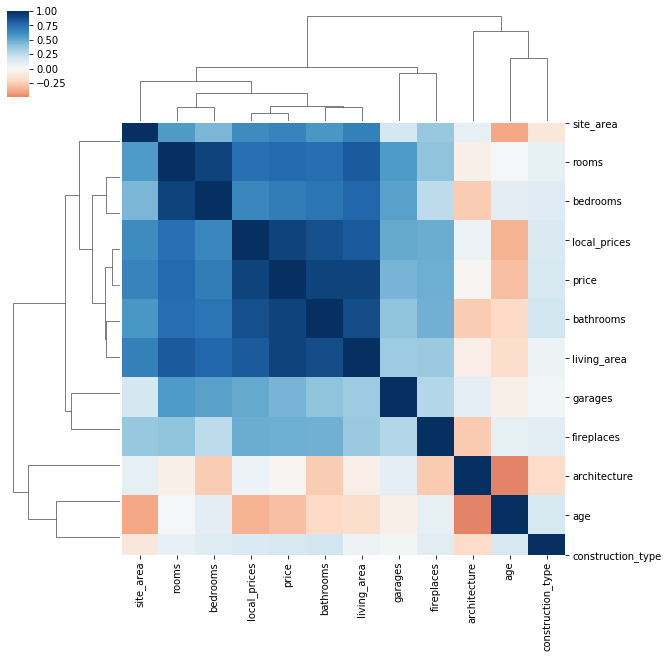

In [319]:
sns.clustermap(df.corr(),cmap='RdBu',center=0);

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)